### Davido: A Lyrical analysis
This exercise will pull all the songs by 2Face Idibia on Genius.com and run sentiment analysis on the lyrics to determine the sentiment polatiry for the songs.

Searching for songs by burna boy...

Changing artist name to 'Burna Boy'
Song 1: "Ye"
Song 2: "On the Low"
Song 3: "Anybody"
Song 4: "Gbona"
Song 5: "JA ARA E"
Song 6: "Gum Body"
Song 7: "Pree Me"
Song 8: "Dangote"
Song 9: "Collateral Damage"
Song 10: "Pull Up"
Song 11: "African Giant"
Song 12: "Secret"
Song 13: "Heaven’s Gate"
Song 14: "Sekkle Down"
Song 15: "Wetin Man Go Do"
Song 16: "Like To Party"
Song 17: "Omo"
Song 18: "Another Story"
Song 19: "Deja Vu"
Song 20: "Different"
Song 21: "Soke"
Song 22: "Rock Your Body"
Song 23: "Calm Down"
Song 24: "Spiritual"
Song 25: "Streets of Africa"
Song 26: "Devil In California"
Song 27: "Tonight"
Song 28: "Giddem"
Song 29: "Hallelujah"
Song 30: "Agbada"
Song 31: "More Life"
Song 32: "Destiny"
Song 33: "Smoke Some Weed"
Song 34: "Freedom"
Song 35: "Outside"
Song 36: "This Side"
Song 37: "Show & Tell"
Song 38: "#yawadey"
Song 39: "Odogwu"
Song 40: "Koni Baje"
Song 41: "Where I’m From"
Song 42: "PH City Vibration"
Song 43: "Don Gorgon"
Song 44: 

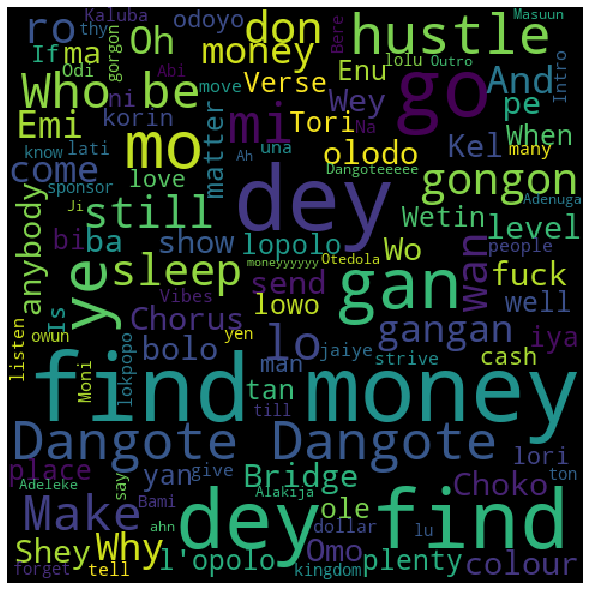

C:\Users\padax\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\padax\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


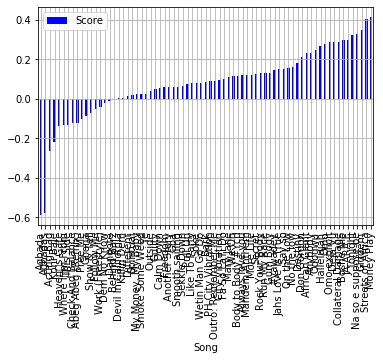

In [2]:
import lyricsgenius
import pandas as pd
import json
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

genius_client_id = 'mM_UqRz1pNsawnzq1KJ9aSrvsz3P6wTLARQNongLrcXZpTiRA25ul_xD5gqQTSDo'
genius_secret = 'KyNJWaxnx3TSySHdnnA07E5Abw1G5X--SPz33sBJ65XdQni-UKVOYW8owdH9o2lRH7u9ykvml9_4jEghf7qnZw'
genius_token = 'W7RIDSht2rGxPSp4c6R2xwXMeEu6nWJvgedjI_a9ANczFGlkDz6JkHSfkXtsehnH'

genius = lyricsgenius.Genius(genius_token)

tasha = genius.search_artist("burna boy", sort="popularity")

tasha.save_lyrics()

with open('Lyrics_BurnaBoy.json') as json_file:
    Artist = json.load(json_file)

lyrics = {}
for x in range(len(Artist["songs"])):
    lyrics[Artist["songs"][x]["title"]] = Artist["songs"][x]["lyrics"]
    
wordcloud = WordCloud(width=480, height=480, margin=0).generate(lyrics['Dangote'])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

lyrics_songlist = [] #List of all the songs and their lyrics.
for song in lyrics:
    temp = [song, lyrics[song]]
    lyrics_songlist.append(temp)
    
import pandas as pd
import csv
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

x = 0
with open('burna_scores.csv','w') as f1:
    writer=csv.writer(f1, delimiter=',',lineterminator='\n',)
    for song in lyrics:
        sent = TextBlob(str(lyrics[song]))
        row = (lyrics_songlist[x][0], round(sent.sentiment.polarity,3))
        x = x+1
        writer.writerow(row)
        
data = pd.read_csv("burna_scores.csv",names = ['Song', 'Score'], encoding='latin-1')

import matplotlib.pyplot as plt
data.sort_values('Score', ascending = True, inplace= True)
data.plot(kind='bar',x='Song',y='Score',color='blue')
plt.rcParams['figure.figsize'] = [20, 15]
plt.grid(b=None, which='major', axis='both')
plt.show()